In [1]:
!python --version

Python 3.8.15


In [2]:
from platform import python_version
print(python_version())

3.8.15


In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder 

2025-01-13 21:51:57.046964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(pd.__version__)
print(tf.__version__)
print(np.__version__)
print(sklearn.__version__)

1.3.5
2.10.0
1.21.6
0.24.2


In [5]:
train_df = pd.read_csv("Dataset/data.csv")
train_df.columns = ['sentence', 'language']
train_df.head()

,sentence,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [6]:
# Convert all values in the 'language' column to lowercase
train_df['language'] = train_df['language'].str.lower()

# Display the first few rows to verify
train_df.head()

,sentence,language
0,klement gottwaldi surnukeha palsameeriti ning ...,estonian
1,sebes joseph pereira thomas på eng the jesuit...,swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,tamil
4,de spons behoort tot het geslacht haliclona en...,dutch


In [7]:
train_df['language'].value_counts()

spanish       1966
persian       1889
french        1868
english       1836
chinese       1000
arabic        1000
russian       1000
romanian      1000
pushto        1000
hindi         1000
korean        1000
estonian      1000
swedish       1000
portugese     1000
indonesian    1000
urdu          1000
latin         1000
turkish       1000
japanese      1000
dutch         1000
tamil         1000
thai          1000
italian        963
Name: language, dtype: int64

In [8]:
train_df['language'].unique()

array(['estonian', 'swedish', 'thai', 'tamil', 'dutch', 'japanese',
       'turkish', 'latin', 'urdu', 'indonesian', 'portugese', 'french',
       'chinese', 'korean', 'hindi', 'spanish', 'pushto', 'persian',
       'romanian', 'russian', 'english', 'arabic', 'italian'],
      dtype=object)

In [9]:
train_df.shape

(26522, 2)

In [10]:
num_classes = len(train_df.language.unique())
num_classes

23

The expression `r'[^\w\s]'` is a **regular expression** (regex) used to match characters based on specific rules. Here's a breakdown of its components:

1. **`[ ]`**: Denotes a character set. This matches any single character that is specified inside the brackets.

2. **`^` (caret)**: Inside a character set, the `^` negates the set. This means it will match any character *not* specified inside the brackets.

3. **`\w`**: Matches any **word character**, which includes:
   - Letters (`a-z`, `A-Z`)
   - Digits (`0-9`)
   - The underscore (`_`)

4. **`\s`**: Matches any **whitespace character**, including spaces, tabs, and newlines.

5. **`[^\w\s]`**: Matches any character that is *not* a word character or a whitespace character. Essentially, it matches **punctuation, special characters, or symbols**.

6. **`regex=True`**: Indicates that the replacement should interpret the pattern as a regular expression.

### Purpose:
In this context, the code `str.replace('[^\w\s]', '', regex=True)` replaces all non-word and non-whitespace characters (e.g., punctuation like `!`, `?`, `.`, etc.) with an empty string (`''`). This effectively removes punctuation and special symbols from the text.

In [11]:
# Convert all characters in the 'sentence' column to lowercase and store in a new column 'sentence_lower'
train_df['sentence_lower'] = train_df["sentence"].str.lower()

# Remove all punctuation from the 'sentence_lower' column using a regex pattern and store in a new column 'sentence_no_punctuation'
train_df['sentence_no_punctuation'] = train_df['sentence_lower'].str.replace('[^\w\s]', '', regex=True)

# Replace any NaN values in the 'sentence_no_punctuation' column with the string "fillna"
train_df['sentence_no_punctuation'] = train_df["sentence_no_punctuation"].fillna("fillna")

In [12]:
train_df.iloc[0]

sentence                   klement gottwaldi surnukeha palsameeriti ning ...
language                                                            estonian
sentence_lower             klement gottwaldi surnukeha palsameeriti ning ...
sentence_no_punctuation    klement gottwaldi surnukeha palsameeriti ning ...
Name: 0, dtype: object

In [13]:
# Extract the 'language' column from the DataFrame and assign it to the variable Y (target labels)
Y = train_df['language']

print(Y)
# Create an instance of the LabelEncoder, which is used to convert categorical labels into numeric format
encoder = LabelEncoder()

# Fit the LabelEncoder to the unique values in Y and transform them into numeric codes
Y = encoder.fit_transform(Y)

# Display the transformed labels (now numeric values instead of original categorical labels)
print(Y)

0        estonian
1         swedish
2            thai
3           tamil
4           dutch
           ...   
26517     persian
26518     persian
26519     persian
26520     persian
26521     persian
Name: language, Length: 26522, dtype: object
[ 4 18 20 ... 12 12 12]


In [14]:
encoder.classes_

array(['arabic', 'chinese', 'dutch', 'english', 'estonian', 'french',
       'hindi', 'indonesian', 'italian', 'japanese', 'korean', 'latin',
       'persian', 'portugese', 'pushto', 'romanian', 'russian', 'spanish',
       'swedish', 'tamil', 'thai', 'turkish', 'urdu'], dtype=object)

In [15]:
num_classes

23

In [16]:
# Convert the numeric labels (Y) into one-hot encoded vectors using TensorFlow's utility function
Y = tf.keras.utils.to_categorical(
    Y,  # The array of numeric labels to be one-hot encoded
    num_classes=num_classes  # The total number of unique classes (defines the one-hot vector size)
)

# Display the one-hot encoded labels
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
max_features = 304055 # we set maximum number of words to 304055
maxlen = 500 # we set maximum sequence length to 500

In [19]:
# Create an instance of TensorFlow's Tokenizer, which is used for text tokenization
tok = tf.keras.preprocessing.text.Tokenizer(num_words = max_features, char_level=False)

# Fit the Tokenizer on the cleaned text from the 'sentence_no_punctuation' column
# This step builds the vocabulary (word index) based on the text data
tok.fit_on_texts(list(train_df['sentence_no_punctuation']))  # Convert the text column to a list for processing

In [20]:
len(tok.word_index)

304055

In [21]:
vocab_size = len(tok.word_index) + 1 

```python
# Calculate the vocabulary size by counting the unique words in the Tokenizer's word index and adding 1
# This represents the total number of words to be tokenized, including a reserved index (e.g., for padding)
vocab_size = len(tok.word_index) + 1 
```

### Explanation:
- **`tok.word_index`**: 
  - This is a dictionary created by the `Tokenizer`, where keys are words, and values are their corresponding unique integer IDs.
  - Example: `{'hello': 1, 'world': 2}` if "hello" and "world" are in the text.

- **`len(tok.word_index)`**: 
  - Counts the number of unique words in the vocabulary.

- **`+ 1`**: 
  - Adds 1 to the vocabulary size to account for a reserved token (usually `0`), which is often used for **padding** or other purposes.

In [22]:
train_df.loc[0, 'sentence_no_punctuation']

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel  nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel  nime gotvald'

In [23]:
train_df.loc[0, 'language']

'estonian'

In [24]:
# Convert each sentence in the 'sentence_no_punctuation' column to a sequence of integers (tokens)
# based on the word index built by the Tokenizer
train_df = tok.texts_to_sequences(list(train_df['sentence_no_punctuation'])) 

In [25]:
train_df[0]

[38457,
 110283,
 18248,
 110284,
 362,
 67706,
 110285,
 18248,
 303,
 1760,
 26781,
 67707,
 82,
 110286,
 110287,
 362,
 11654,
 110288,
 67708,
 110289,
 374,
 26782,
 247,
 18248,
 110290,
 7220,
 82,
 110291,
 110292,
 8966,
 23133,
 2910,
 4744,
 110293,
 38458,
 110294,
 38459,
 23133,
 110295,
 8966,
 2910,
 4744,
 110296]

In [26]:
# Pad all sequences in 'train_df' to a fixed length defined by 'maxlen'
# Padding is applied to the beginning ('pre') of sequences shorter than 'maxlen'
train_df = tf.keras.preprocessing.sequence.pad_sequences(
    train_df,  # List of tokenized sequences
    maxlen=maxlen,  # Desired fixed length for all sequences
    padding='pre'  # Add padding to the start of each sequence
)

In [27]:
train_df[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [28]:
from sklearn.model_selection import train_test_split # divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=42)

### Explanation of Each Layer:

1. **Embedding Layer**:
   - **Purpose**: Converts tokenized word indices into dense vector representations (embeddings).
   - **Key Parameters**:
     - **`input_dim=vocab_size`**: Size of the vocabulary. This defines how many unique tokens are in the dataset (including padding).
     - **`output_dim=embedding_dim`**: The dimensionality of each word vector. We set it to 300, meaning each word is represented as a 300-dimensional dense vector.
     - **`input_length=maxlen`**: Specifies the length of input sequences. This ensures the output of the embedding layer has a consistent shape.
   - **Output Shape**: `(batch_size, maxlen, embedding_dim)`.

2. **Flatten Layer**:
   - **Purpose**: Converts the 3D tensor output of the embedding layer into a 1D vector for input into the dense layer.
   - **Input Shape**: `(batch_size, maxlen, embedding_dim)`.
   - **Output Shape**: `(batch_size, maxlen * embedding_dim)`.

3. **Dense Layer**:
   - **Purpose**: Produces the final predictions for each class.
   - **Key Parameters**:
     - **`num_classes`**: The number of unique output classes.
     - **`activation='softmax'`**: Ensures the output is a probability distribution across classes, suitable for multi-class classification.
   - **Output Shape**: `(batch_size, num_classes)`.

In [36]:
num_classes

23

In [37]:
# Set the embedding vector dimension size
embedding_dim = 350

# Define a sequential model (stack layers sequentially)
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.LSTM(128),      # Use LSTM to capture sequential patterns
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])



In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',  # Built-in accuracy metric
        tf.keras.metrics.Precision(),  # Precision metric
        tf.keras.metrics.Recall()  # Recall metric
    ]
)

### Explanation of the Model Compilation Code

### **Components**
#### 1. **`optimizer='adam'`**
- **Adam Optimizer**:
  - Combines the benefits of **Adaptive Gradient Algorithm (AdaGrad)** and **Root Mean Square Propagation (RMSProp)**.
  - Efficient for handling sparse gradients and non-stationary objectives.
  - Automatically adjusts the learning rate during training.

---

#### 2. **`loss='categorical_crossentropy'`**
- **Categorical Cross-Entropy Loss**:
  - Used for multi-class classification problems where labels are one-hot encoded.
  - Measures the difference between the predicted probability distribution and the true distribution.
    
---

#### 3. **`metrics`**
- A list of metrics to evaluate during training and validation. These do not affect the training process directly but are used for monitoring model performance.

1. **`accuracy`**:
   - Measures the percentage of correct predictions.
   - For multi-class classification, it checks if the predicted class (highest softmax probability) matches the true class.

2. **`tf.keras.metrics.Precision()`**:
   - **Precision** measures the proportion of true positive predictions among all positive predictions.
   - Indicates how many of the predicted positive labels were correct.

3. **`tf.keras.metrics.Recall()`**:
   - **Recall** (also called Sensitivity or True Positive Rate) measures the proportion of true positive predictions among all actual positives.
   - Indicates how well the model captures all relevant instances.

---

### **Summary**
- This configuration optimizes the model with Adam, calculates loss using categorical cross-entropy, and evaluates performance using **accuracy**, **precision**, and **recall**.
- These metrics help monitor the model's effectiveness for classification tasks and provide insights into its ability to make accurate predictions while balancing false positives and false negatives.


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 350)          106419600 
                                                                 
 lstm_1 (LSTM)               (None, 128)               245248    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 23)               

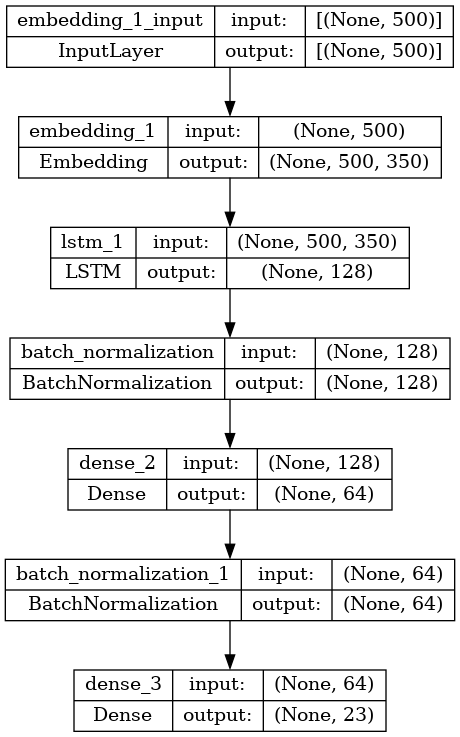

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, 
    to_file='Model/LSTM/model_structure.png',  # Save the image to this file
    show_shapes=True,              # Display the output shapes of each layer
    show_layer_names=True,         # Display the layer names
    dpi=96                         # Adjust the resolution
)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor (e.g., val_loss or val_accuracy)
    patience=3,               # Number of epochs to wait without improvement
    restore_best_weights=True # Restore the model weights from the epoch with the best value
)

# Train the model with Early Stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.2,     # Allocate a portion of the data for validation
    epochs=50,                # Maximum number of epochs
    batch_size=32,            # Batch size
    callbacks=[early_stopping] # Add Early Stopping to the callbacks
)

Epoch 1/50
531/531 [==============================] - 1656s 3s/step - loss: 0.4441 - accuracy: 0.8842 - precision_1: 0.9564 - recall_1: 0.8175 - val_loss: 0.2369 - val_accuracy: 0.9314 - val_precision_1: 0.9618 - val_recall_1: 0.9074
Epoch 2/50
531/531 [==============================] - 1577s 3s/step - loss: 0.0950 - accuracy: 0.9770 - precision_1: 0.9868 - recall_1: 0.9672 - val_loss: 0.2011 - val_accuracy: 0.9305 - val_precision_1: 0.9449 - val_recall_1: 0.9218
Epoch 3/50
531/531 [==============================] - 1572s 3s/step - loss: 0.0208 - accuracy: 0.9952 - precision_1: 0.9965 - recall_1: 0.9940 - val_loss: 0.1779 - val_accuracy: 0.9390 - val_precision_1: 0.9513 - val_recall_1: 0.9336
Epoch 4/50
531/531 [==============================] - 1566s 3s/step - loss: 0.0060 - accuracy: 0.9989 - precision_1: 0.9992 - recall_1: 0.9986 - val_loss: 0.1777 - val_accuracy: 0.9409 - val_precision_1: 0.9505 - val_recall_1: 0.9361
Epoch 5/50
531/531 [==============================] - 1559s 3s/s

In [42]:
model.save('Model/LSTM/model.h5')
model.save('Model/LSTM/model')

INFO:tensorflow:Assets written to: Model/LSTM/model/assets


INFO:tensorflow:Assets written to: Model/LSTM/model/assets


In [44]:
model = tf.keras.models.load_model('Model/LSTM/model.h5')

In [45]:
# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=1)
results

166/166 [==============================] - 22s 127ms/step - loss: 0.1700 - accuracy: 0.9431 - precision_1: 0.9508 - recall_1: 0.9399


[0.16995717585086823,
 0.9430725574493408,
 0.950800895690918,
 0.9398680329322815]

F1-Score: 0.9453
166/166 [==============================] - 22s 129ms/step


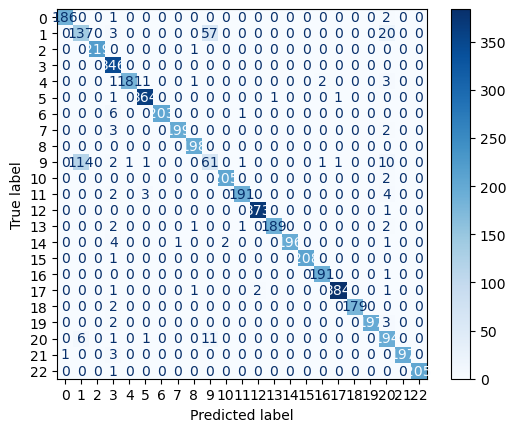

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

precision = results[2]
recall = results[3]

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score:.4f}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [47]:
# Print all classes
print("Classes:", encoder.classes_)

Classes: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [48]:
for class_name in encoder.classes_ :
    class_index = list(encoder.classes_).index(class_name)
    print(f"Index of '{class_name}': {class_index}")

Index of 'arabic': 0
Index of 'chinese': 1
Index of 'dutch': 2
Index of 'english': 3
Index of 'estonian': 4
Index of 'french': 5
Index of 'hindi': 6
Index of 'indonesian': 7
Index of 'italian': 8
Index of 'japanese': 9
Index of 'korean': 10
Index of 'latin': 11
Index of 'persian': 12
Index of 'portugese': 13
Index of 'pushto': 14
Index of 'romanian': 15
Index of 'russian': 16
Index of 'spanish': 17
Index of 'swedish': 18
Index of 'tamil': 19
Index of 'thai': 20
Index of 'turkish': 21
Index of 'urdu': 22


In [49]:
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
original_classes = encoder.inverse_transform(indices)
print(f"Classes for indices {indices}: {original_classes}")

Classes for indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [50]:
# Class to Index Mapping
class_to_index = {class_name: index for index, class_name in enumerate(encoder.classes_)}
print("Class to Index Mapping:", class_to_index)

# Index to Class Mapping
index_to_class = {index: class_name for index, class_name in enumerate(encoder.classes_)}
print("Index to Class Mapping:", index_to_class)

# Retrieve index for a specific class
class_name = 'persian'
class_index = encoder.transform([class_name])[0]
print(f"Index of '{class_name}': {class_index}")

# Retrieve class for a specific index
index = 12
original_class = encoder.inverse_transform([index])[0]
print(f"Class for index {index}: {original_class}")

Class to Index Mapping: {'arabic': 0, 'chinese': 1, 'dutch': 2, 'english': 3, 'estonian': 4, 'french': 5, 'hindi': 6, 'indonesian': 7, 'italian': 8, 'japanese': 9, 'korean': 10, 'latin': 11, 'persian': 12, 'portugese': 13, 'pushto': 14, 'romanian': 15, 'russian': 16, 'spanish': 17, 'swedish': 18, 'tamil': 19, 'thai': 20, 'turkish': 21, 'urdu': 22}
Index to Class Mapping: {0: 'arabic', 1: 'chinese', 2: 'dutch', 3: 'english', 4: 'estonian', 5: 'french', 6: 'hindi', 7: 'indonesian', 8: 'italian', 9: 'japanese', 10: 'korean', 11: 'latin', 12: 'persian', 13: 'portugese', 14: 'pushto', 15: 'romanian', 16: 'russian', 17: 'spanish', 18: 'swedish', 19: 'tamil', 20: 'thai', 21: 'turkish', 22: 'urdu'}
Index of 'persian': 12
Class for index 12: persian


In [51]:
new_text = ["tensorflow is a great tool you can find a lot of tutorials from"]

In [52]:
test_text = tok.texts_to_sequences(new_text)
test_text = tf.keras.preprocessing.sequence.pad_sequences(test_text, maxlen = maxlen)

In [53]:
predictions = model.predict(test_text)
print(predictions.argmax())
print(predictions)

1/1 [==============================] - 0s 69ms/step
3
[[1.3422233e-04 2.1997499e-01 4.2047449e-03 6.1879593e-01 1.4269046e-04
  3.4348090e-04 6.6534758e-02 3.2680666e-05 8.9399074e-04 7.4586242e-02
  1.1320059e-05 6.1752193e-04 3.2130763e-05 1.6978194e-03 3.3661304e-04
  1.5293817e-03 2.0190477e-04 2.9796266e-04 4.4729961e-05 1.7518050e-04
  7.7783600e-03 1.2248659e-03 4.0843061e-04]]


In [54]:
# Print all classes
print("Classes:", encoder.classes_)

Classes: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [55]:
def lang_detector(txt):
    tmp = tok.texts_to_sequences(txt)
    tmp = tf.keras.preprocessing.sequence.pad_sequences(tmp, maxlen = maxlen)
    prediction = model.predict(tmp)
    label = prediction.argmax()
    prediction = encoder.inverse_transform([label])
    print(txt, prediction)    

In [66]:
# tmp_txt = ["tensorflow est un excellent outil vous pouvez trouver beaucoup de tutoriels de"]
# tmp_txt = ["tensorflow è un ottimo strumento puoi trovare molti tutorial di"]
# tmp_txt = ["tensorflow es una gran herramienta puedes encontrar muchos tutoriales de"]
tmp_txt = ["tensorflow یک ابزار عالی است که می توانید آموزش های زیادی از آن بیابید"]

lang_detector(tmp_txt)

1/1 [==============================] - 0s 69ms/step
Input Text: tensorflow یک ابزار عالی است که می توانید آموزش های زیادی از آن بیابید
Predicted Language: persian



In [67]:
# Define a list of sentences in different languages, each with approximately 20 words
tmp_txt = [
    # Arabic
    "هذا النص مكتوب باللغة العربية ويحتوي على عشرين كلمة لتوضيح الفكرة في نموذج التعلم العميق الخاص بنا.",
    # Chinese
    "这是一个用中文写的句子，有二十个词，用于测试深度学习模型的语言检测功能。",
    # Dutch
    "Dit is een zin geschreven in het Nederlands met twintig woorden om het taaldetectiemodel te testen.",
    # English
    "This is a sentence written in English with twenty words to demonstrate the language detection model's functionality.",
    # Estonian
    "See on eesti keeles kirjutatud lause, millel on kakskümmend sõna, et demonstreerida mudeli keele tuvastamist.",
    # French
    "Ceci est une phrase écrite en français avec vingt mots pour tester la détection de langue du modèle.",
    # Hindi
    "यह हिंदी में लिखा गया एक वाक्य है जिसमें बीस शब्द हैं और इसका उद्देश्य भाषा पहचान करना है।",
    # Indonesian
    "Ini adalah kalimat dalam bahasa Indonesia dengan dua puluh kata untuk menguji kemampuan deteksi bahasa model.",
    # Italian
    "Questa è una frase scritta in italiano con venti parole per dimostrare il rilevamento della lingua del modello.",
    # Japanese
    "これは日本語で書かれた文章で、モデルの言語検出機能をテストするための20語が含まれています。",
    # Korean
    "이 문장은 한국어로 작성되었으며 모델의 언어 감지 기능을 테스트하기 위해 20단어를 포함합니다.",
    # Latin
    "Hoc est sententia Latine scripta viginti verbis ad exemplum linguae detectionis demonstrandum.",
    # Persian
    "این جمله‌ای است که به زبان فارسی نوشته شده و شامل بیست کلمه برای آزمایش مدل تشخیص زبان است.",
    # Portuguese
    "Esta é uma frase escrita em português com vinte palavras para testar a funcionalidade de detecção de idiomas do modelo.",
    # Pushto
    "دا یو متن دی چې په پښتو ژبه لیکل شوی او شل کلمې لري ترڅو د ژبې ماډل وازمایي.",
    # Romanian
    "Aceasta este o propoziție scrisă în limba română cu douăzeci de cuvinte pentru a testa modelul de detectare a limbii.",
    # Russian
    "Это предложение на русском языке из двадцати слов для тестирования функции обнаружения языка модели.",
    # Spanish
    "Esta es una oración escrita en español con veinte palabras para demostrar el modelo de detección de idiomas.",
    # Swedish
    "Detta är en mening skriven på svenska med tjugo ord för att testa modellens språkdetection.",
    # Tamil
    "இது தமிழ் மொழியில் எழுதப்பட்ட ஒரு வாக்கியம், இது மொழி கண்டறிதல் மாடலை சோதிக்கின்றது.",
    # Thai
    "นี่คือประโยคที่เขียนด้วยภาษาไทยมีคำยี่สิบคำเพื่อทดสอบความสามารถของโมเดลในการตรวจจับภาษา.",
    # Turkish
    "Bu, Türkçe yazılmış, modelin dil algılama işlevini test etmek için yirmi kelime içeren bir cümledir.",
    # Urdu
    "یہ ایک جملہ ہے جو اردو میں لکھا گیا ہے اور اس میں زبان کی شناخت کے لیے بیس الفاظ ہیں۔"
]

In [68]:
def lang_detector(texts):
    """
    Detects the language of the input text(s) using the trained model.

    Args:
        texts (list of str): A list of sentences for which language prediction is required.

    Returns:
        None: Prints each input sentence with its predicted language.
    """
    # Convert the input texts to sequences using the tokenizer
    sequences = tok.texts_to_sequences(texts)
    
    # Pad the sequences to match the input length of the model
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
    
    # Predict the language probabilities for the input sentences
    predictions = model.predict(padded_sequences)
    
    # Get the predicted language for each sentence
    predicted_labels = predictions.argmax(axis=1)
    
    # Convert the numeric labels back to their language names
    predicted_languages = encoder.inverse_transform(predicted_labels)
    
    # Print the results for each input sentence
    for text, language in zip(texts, predicted_languages):
        print(f"Input Text: {text}\nPredicted Language: {language}\n")

In [69]:
# Detect and print the predicted languages for the input sentences
lang_detector(tmp_txt)

1/1 [==============================] - 0s 161ms/step
Input Text: هذا النص مكتوب باللغة العربية ويحتوي على عشرين كلمة لتوضيح الفكرة في نموذج التعلم العميق الخاص بنا.
Predicted Language: arabic

Input Text: 这是一个用中文写的句子，有二十个词，用于测试深度学习模型的语言检测功能。
Predicted Language: chinese

Input Text: Dit is een zin geschreven in het Nederlands met twintig woorden om het taaldetectiemodel te testen.
Predicted Language: dutch

Input Text: This is a sentence written in English with twenty words to demonstrate the language detection model's functionality.
Predicted Language: english

Input Text: See on eesti keeles kirjutatud lause, millel on kakskümmend sõna, et demonstreerida mudeli keele tuvastamist.
Predicted Language: estonian

Input Text: Ceci est une phrase écrite en français avec vingt mots pour tester la détection de langue du modèle.
Predicted Language: french

Input Text: यह हिंदी में लिखा गया एक वाक्य है जिसमें बीस शब्द हैं और इसका उद्देश्य भाषा पहचान करना है।
Predicted Language: hindi

Input Tex